In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test)=keras.datasets.boston_housing.load_data()

In [3]:
#共有404筆資料，每筆資料13個欄位
X_train.shape

(404, 13)

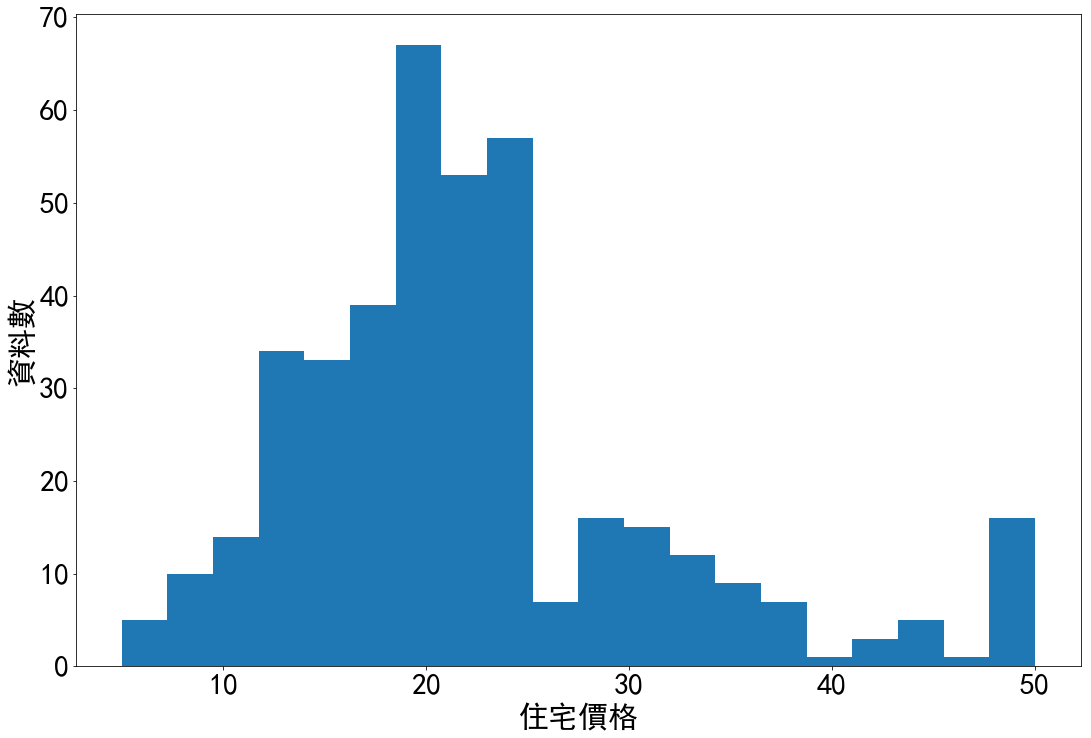

Text(0, 0.5, '住宅價格')

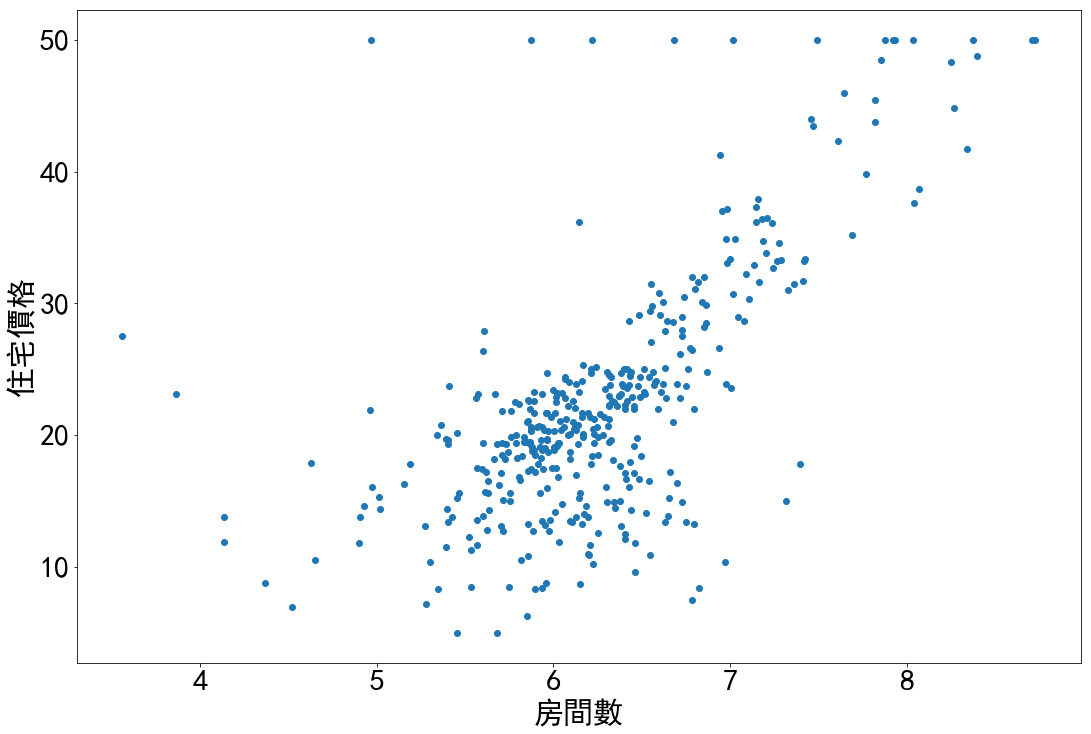

In [4]:
plt.rcParams['font.size']=10*3
plt.rcParams['figure.figsize']=[18,12]
#顯示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
#讓負號正常顯示
plt.rcParams['axes.unicode_minus']=False

#直方圖
plt.hist(y_train, bins=20)
plt.xlabel('住宅價格')
plt.ylabel('資料數')
plt.show()


#離散圖
#房間數越多，住宅價格越高
plt.plot(X_train[:,5],y_train,'o')
plt.xlabel('房間數')
plt.ylabel('住宅價格')

Text(0, 0.5, '住宅價格')

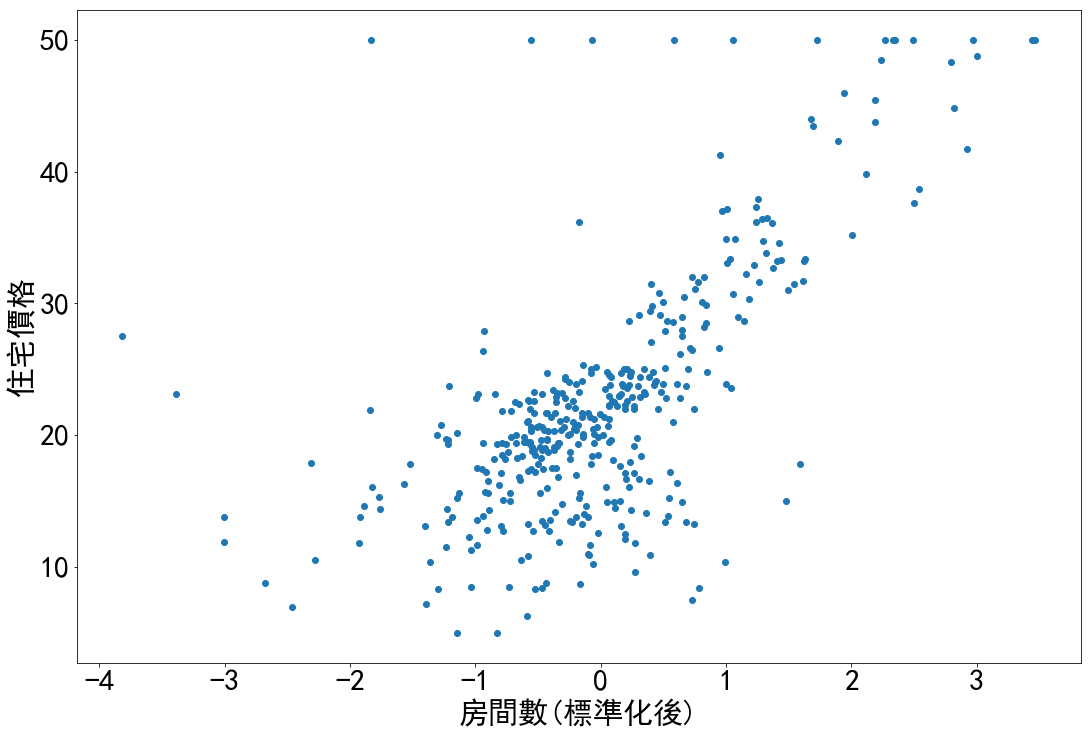

In [5]:
#標準化
#x'=(x-mu)/std

#觀察與上圖的差異
#經過標準化後，房間數資料集中在原點附近
#變數經過標準化後，收斂較快，準確度也會提高
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)

X_train = (X_train - X_train_mean)/X_train_std
X_test = (X_test - X_train_mean)/X_train_std

#取第5個欄位
plt.plot(X_train[:,5],y_train,'o')
plt.xlabel('房間數(標準化後)')
plt.ylabel('住宅價格')


In [6]:
#自變數
X= tf.placeholder(tf.float32, (None, 1), name='x')

#住宅價格
y=tf.placeholder(tf.float32, (None, 1), name='y')

b=tf.Variable(tf.zeros([1]))

#權重
w = tf.Variable(tf.random_normal((1, 1)))

#迴歸方程式
pred=tf.matmul(X,w)+b


Instructions for updating:
Colocations handled automatically by placer.


In [7]:
#實際值與預測值的差距平方式為誤差
#最佳化就是找出最小化誤差的參數

loss = tf.reduce_mean((y - pred))
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.1
)
train_step = optimizer.minimize(loss)

In [8]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(200):
        train_loss, _ = sess.run(
            [loss, train_step],
            feed_dict={
                X: X_train[:,5].reshape((-1,1)),
                y: y_train.reshape((-1, 1))
            }
        )
        print('step: {}, train_loss: {}'.format(
               step, train_loss
        ))

    pred_ = sess.run(
        pred,
        feed_dict={
            X: X_test[:,5].reshape((-1,1))
        }
    )

step: 0, train_loss: 22.395050048828125
step: 1, train_loss: 22.2950496673584
step: 2, train_loss: 22.195049285888672
step: 3, train_loss: 22.095050811767578
step: 4, train_loss: 21.99505043029785
step: 5, train_loss: 21.895050048828125
step: 6, train_loss: 21.7950496673584
step: 7, train_loss: 21.695049285888672
step: 8, train_loss: 21.595050811767578
step: 9, train_loss: 21.49505043029785
step: 10, train_loss: 21.395048141479492
step: 11, train_loss: 21.2950496673584
step: 12, train_loss: 21.195049285888672
step: 13, train_loss: 21.095048904418945
step: 14, train_loss: 20.99505043029785
step: 15, train_loss: 20.895048141479492
step: 16, train_loss: 20.7950496673584
step: 17, train_loss: 20.695049285888672
step: 18, train_loss: 20.595048904418945
step: 19, train_loss: 20.49505043029785
step: 20, train_loss: 20.395048141479492
step: 21, train_loss: 20.2950496673584
step: 22, train_loss: 20.195049285888672
step: 23, train_loss: 20.095050811767578
step: 24, train_loss: 19.99505043029785


Text(0, 0.5, '住宅價格')

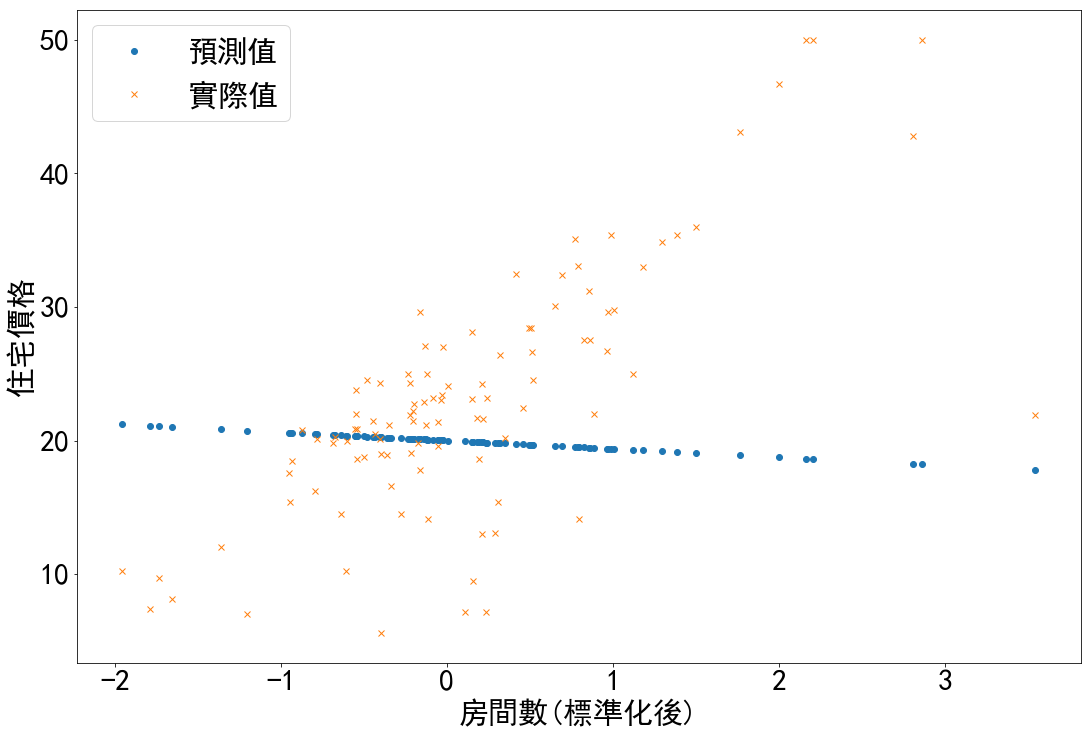

In [9]:
plt.plot(X_test[:, 5], pred_, 'o', label='預測值')
plt.plot(X_test[:, 5], y_test, 'x', label='實際值')
plt.legend(loc='upper left')
plt.xlabel('房間數(標準化後)')
plt.ylabel('住宅價格')

In [10]:
#小批次大小

import numpy as np

def get_batches(x, y, batch_size):
    n_data = len(x)
    indices = np.arange(n_data)
    np.random.shuffle(indices)
    x_shuffled = x[indices]
    y_shuffled = y[indices]
    
    for i in range(0, n_data, batch_size):
        x_batch = x_shuffled[i: i + batch_size]
        y_batch = y_shuffled[i: i + batch_size]
        yield x_batch, y_batch

In [11]:
#重取資料

(x_train, y_train), (x_test, y_test)=keras.datasets.boston_housing.load_data()

x_train_mean = x_train.mean(axis=0)
x_train_std = x_train.std(axis=0)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_train_mean)/x_train_std


x = tf.placeholder(tf.float32, (None, 13), name='x')
y = tf.placeholder(tf.float32, (None, 1), name='y')

w = tf.Variable(tf.random_normal((13, 1)))
pred = tf.matmul(x, w)

In [12]:
loss = tf.reduce_mean((y - pred)**2)
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=0.1
)
train_step = optimizer.minimize(loss)

In [13]:
BATCH_SIZE = 32

step = 0
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(100):
        for x_batch, y_batch in get_batches(x_train, y_train, 32):
            train_loss, _ = sess.run(
                [loss, train_step],
                feed_dict={
                    x: x_batch,
                    y: y_batch.reshape((-1, 1))
                }
            )
            print('step: {}, train_loss: {}'.format(
                step, train_loss
            ))
            step += 1
    
    pred_ = sess.run(
        pred,
        feed_dict={
            x: x_test
        }
    )

step: 0, train_loss: 543.4400634765625
step: 1, train_loss: 589.7196044921875
step: 2, train_loss: 491.8576354980469
step: 3, train_loss: 588.882080078125
step: 4, train_loss: 494.2906494140625
step: 5, train_loss: 564.5938110351562
step: 6, train_loss: 626.8621826171875
step: 7, train_loss: 487.07733154296875
step: 8, train_loss: 536.9705200195312
step: 9, train_loss: 471.79229736328125
step: 10, train_loss: 603.6590576171875
step: 11, train_loss: 559.40478515625
step: 12, train_loss: 883.36572265625
step: 13, train_loss: 629.3941650390625
step: 14, train_loss: 590.3656005859375
step: 15, train_loss: 486.70892333984375
step: 16, train_loss: 706.0912475585938
step: 17, train_loss: 634.6310424804688
step: 18, train_loss: 649.282470703125
step: 19, train_loss: 532.9046020507812
step: 20, train_loss: 501.9420166015625
step: 21, train_loss: 509.31024169921875
step: 22, train_loss: 505.64593505859375
step: 23, train_loss: 549.5789794921875
step: 24, train_loss: 573.344970703125
step: 25, tr

step: 224, train_loss: 488.53802490234375
step: 225, train_loss: 470.4898681640625
step: 226, train_loss: 491.3605651855469
step: 227, train_loss: 590.1142578125
step: 228, train_loss: 542.2833862304688
step: 229, train_loss: 540.0626831054688
step: 230, train_loss: 809.0870971679688
step: 231, train_loss: 818.6826171875
step: 232, train_loss: 609.3375244140625
step: 233, train_loss: 597.9183349609375
step: 234, train_loss: 602.8319091796875
step: 235, train_loss: 526.5938110351562
step: 236, train_loss: 553.9261474609375
step: 237, train_loss: 499.9356689453125
step: 238, train_loss: 783.6171875
step: 239, train_loss: 786.9505615234375
step: 240, train_loss: 619.6990356445312
step: 241, train_loss: 490.7558288574219
step: 242, train_loss: 670.903076171875
step: 243, train_loss: 554.9612426757812
step: 244, train_loss: 521.2969970703125
step: 245, train_loss: 501.0347900390625
step: 246, train_loss: 550.5296020507812
step: 247, train_loss: 514.5948486328125
step: 248, train_loss: 453.4

step: 472, train_loss: 484.806640625
step: 473, train_loss: 737.1190795898438
step: 474, train_loss: 701.3729858398438
step: 475, train_loss: 511.62078857421875
step: 476, train_loss: 775.0221557617188
step: 477, train_loss: 628.5711059570312
step: 478, train_loss: 492.49603271484375
step: 479, train_loss: 616.8892211914062
step: 480, train_loss: 687.714599609375
step: 481, train_loss: 674.9542236328125
step: 482, train_loss: 535.6727294921875
step: 483, train_loss: 572.693359375
step: 484, train_loss: 525.2594604492188
step: 485, train_loss: 528.104736328125
step: 486, train_loss: 648.7545776367188
step: 487, train_loss: 551.5470581054688
step: 488, train_loss: 552.6947021484375
step: 489, train_loss: 611.4537353515625
step: 490, train_loss: 654.8701171875
step: 491, train_loss: 549.132080078125
step: 492, train_loss: 631.1943359375
step: 493, train_loss: 466.54052734375
step: 494, train_loss: 483.96728515625
step: 495, train_loss: 634.7939453125
step: 496, train_loss: 586.67523193359

step: 744, train_loss: 506.9129943847656
step: 745, train_loss: 540.293701171875
step: 746, train_loss: 645.4814453125
step: 747, train_loss: 546.06201171875
step: 748, train_loss: 642.4642333984375
step: 749, train_loss: 660.3150634765625
step: 750, train_loss: 539.2644653320312
step: 751, train_loss: 490.8878479003906
step: 752, train_loss: 645.687744140625
step: 753, train_loss: 577.4210205078125
step: 754, train_loss: 560.83984375
step: 755, train_loss: 645.3317260742188
step: 756, train_loss: 517.848388671875
step: 757, train_loss: 447.1451416015625
step: 758, train_loss: 537.3140869140625
step: 759, train_loss: 525.3960571289062
step: 760, train_loss: 498.5191345214844
step: 761, train_loss: 492.85064697265625
step: 762, train_loss: 573.9749755859375
step: 763, train_loss: 588.8326416015625
step: 764, train_loss: 687.4803466796875
step: 765, train_loss: 633.0118408203125
step: 766, train_loss: 660.8126220703125
step: 767, train_loss: 556.462646484375
step: 768, train_loss: 628.40

step: 948, train_loss: 712.28125
step: 949, train_loss: 753.2243041992188
step: 950, train_loss: 643.1419677734375
step: 951, train_loss: 563.3906860351562
step: 952, train_loss: 563.04638671875
step: 953, train_loss: 469.0377197265625
step: 954, train_loss: 569.3447875976562
step: 955, train_loss: 751.8695068359375
step: 956, train_loss: 526.39990234375
step: 957, train_loss: 531.8312377929688
step: 958, train_loss: 505.1741943359375
step: 959, train_loss: 559.6517333984375
step: 960, train_loss: 703.2470703125
step: 961, train_loss: 603.5621337890625
step: 962, train_loss: 476.68267822265625
step: 963, train_loss: 510.049560546875
step: 964, train_loss: 709.93408203125
step: 965, train_loss: 793.0637817382812
step: 966, train_loss: 662.7481689453125
step: 967, train_loss: 688.4059448242188
step: 968, train_loss: 575.52001953125
step: 969, train_loss: 574.3392333984375
step: 970, train_loss: 544.23779296875
step: 971, train_loss: 505.0806884765625
step: 972, train_loss: 538.5377807617

step: 1220, train_loss: 572.96337890625
step: 1221, train_loss: 527.0071411132812
step: 1222, train_loss: 529.54443359375
step: 1223, train_loss: 629.0457763671875
step: 1224, train_loss: 548.6810302734375
step: 1225, train_loss: 703.79248046875
step: 1226, train_loss: 511.302490234375
step: 1227, train_loss: 496.1710205078125
step: 1228, train_loss: 647.5360107421875
step: 1229, train_loss: 523.7750244140625
step: 1230, train_loss: 575.16259765625
step: 1231, train_loss: 462.1112060546875
step: 1232, train_loss: 540.275634765625
step: 1233, train_loss: 519.9935913085938
step: 1234, train_loss: 603.28271484375
step: 1235, train_loss: 677.8199462890625
step: 1236, train_loss: 659.6063232421875
step: 1237, train_loss: 656.0763549804688
step: 1238, train_loss: 652.11279296875
step: 1239, train_loss: 453.5804443359375
step: 1240, train_loss: 639.5967407226562
step: 1241, train_loss: 563.6465454101562
step: 1242, train_loss: 555.12255859375
step: 1243, train_loss: 705.173583984375
step: 124

Text(0, 0.5, '住宅價格')

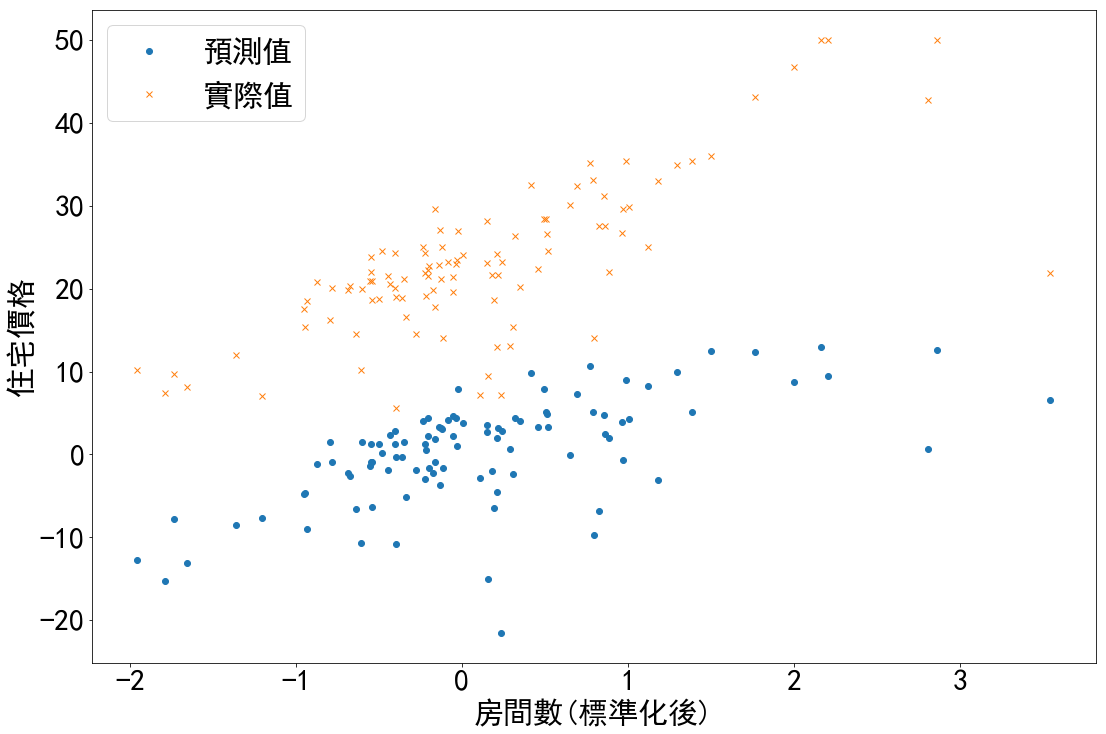

In [14]:
plt.plot(X_test[:, 5], pred_, 'o', label='預測值')
plt.plot(X_test[:, 5], y_test, 'x', label='實際值')
plt.legend(loc='upper left')
plt.xlabel('房間數(標準化後)')
plt.ylabel('住宅價格')